In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 225.0
train_scaled, val_scaled, train_target, val_targe = \
  train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
# Model 함수 구현
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation="relu"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5305 - accuracy: 0.8103
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3946 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3586 - accuracy: 0.8729
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8788
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3233 - accuracy: 0.8848


In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

### 손실 곡선


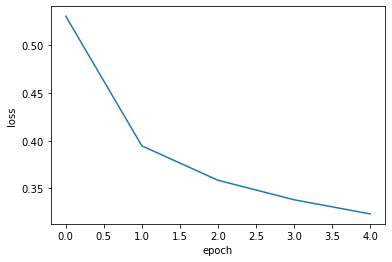

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

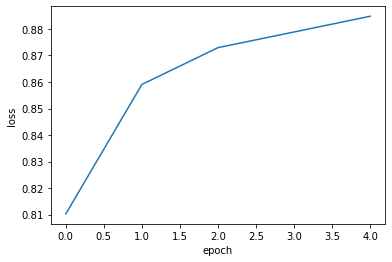

In [10]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

---
### 반복 훈련의 증가

In [11]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5343 - accuracy: 0.8101
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3964 - accuracy: 0.8553
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3572 - accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8802
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3224 - accuracy: 0.8832
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8896
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2993 - accuracy: 0.8954
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2917 - accuracy: 0.8972
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2845 - accuracy: 0.9009
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.279

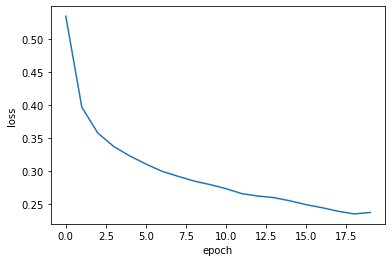

In [12]:
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

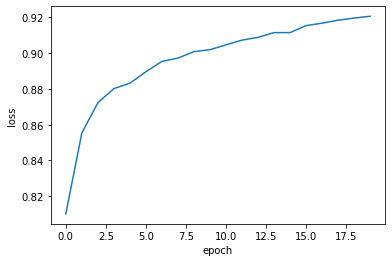

In [13]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

---
### 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [15]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_targe))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5288 - accuracy: 0.8127 - val_loss: 0.3963 - val_accuracy: 0.8591
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3899 - accuracy: 0.8602 - val_loss: 0.3963 - val_accuracy: 0.8626
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3544 - accuracy: 0.8737 - val_loss: 0.3691 - val_accuracy: 0.8725
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8805 - val_loss: 0.3726 - val_accuracy: 0.8730
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3194 - accuracy: 0.8876 - val_loss: 0.3822 - val_accuracy: 0.8672
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3086 - accuracy: 0.8903 - val_loss: 0.3870 - val_accuracy: 0.8727
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.8952 - val_loss: 0.3667 - val_accuracy:

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

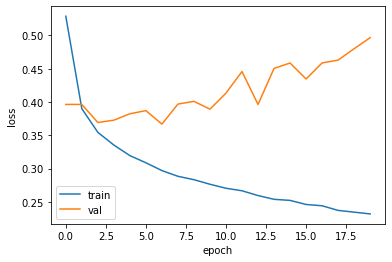

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나    
> 검증세트는 epochs가 증가함에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다    
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.    

---
### Optimizer (adam)

In [19]:
model = model_fn()
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_targe))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5196 - accuracy: 0.8180 - val_loss: 0.4336 - val_accuracy: 0.8450
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8625 - val_loss: 0.3756 - val_accuracy: 0.8637
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8730 - val_loss: 0.3805 - val_accuracy: 0.8652
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3226 - accuracy: 0.8815 - val_loss: 0.3460 - val_accuracy: 0.8770
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.8876 - val_loss: 0.3514 - val_accuracy: 0.8757
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.8941 - val_loss: 0.3365 - val_accuracy: 0.8790
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8978 - val_loss: 0.3434 - val_accuracy:

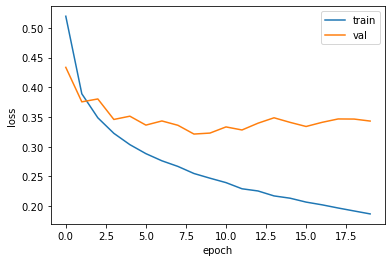

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나    
> 검증세트는 epochs가 증가함에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다    
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.    
> Optimizer(최적화 알고리즘)을 사용한 것이 좀 더 나은 모델이나 검증 손실에 대한 부분(과대적합)은 아직 해결이 안됨    

---
# Dropout
- 규제
- 신경망 모델에만 있음
- 훈련시에만 각 sample을 처리할 때 은닉충의 임의의 node를 계산에 포함시키지 않는다

In [21]:
# model에 dropout을 추가

model = model_fn(keras.layers.Dropout(0.3)) # dropout 30%
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_targe))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5893 - accuracy: 0.7918 - val_loss: 0.4308 - val_accuracy: 0.8432
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4397 - accuracy: 0.8429 - val_loss: 0.3951 - val_accuracy: 0.8571
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4009 - accuracy: 0.8535 - val_loss: 0.3593 - val_accuracy: 0.8695
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8600 - val_loss: 0.3606 - val_accuracy: 0.8673
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3676 - accuracy: 0.8655 - val_loss: 0.3453 - val_accuracy: 0.8721
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3537 - accuracy: 0.8701 - val_loss: 0.3465 - val_accuracy: 0.8716
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3468 - accuracy: 0.8708 - val_loss: 0.3361 - val_accuracy:

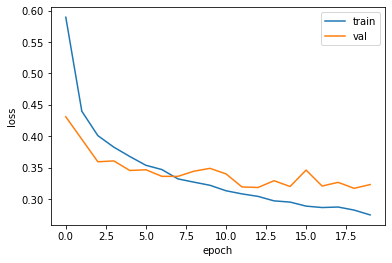

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()

> epochs가 10일 경우가 train과 val의 차이가 적은 것 같다.    
> 기본적으로 훈련세트의 손실이 검증세트보다 적게 나오는 epochs의 개수를 선택한다.    

---
### 모델의 저장과 복원
- hdf5 format으로 저장

In [24]:
# model 저장
model.save("../Data/model-whole.h5")

In [25]:
# 복원
model = keras.models.load_model("../Data/model-whole.h5")

In [26]:
# 사용
model.evaluate(val_scaled, val_targe)

375/375 [==============================] - 1s 1ms/step - loss: 0.3230 - accuracy: 0.8892


[0.32297283411026, 0.8892499804496765]

---
# Callbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장해준다.  <- 굉장히 편함


In [27]:
model = model_fn(keras.layers.Dropout(0.3)) # dropout 30%
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_targe),
          callbacks = [checkpoint_cb]
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5884 - accuracy: 0.7928 - val_loss: 0.4259 - val_accuracy: 0.8485
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4418 - accuracy: 0.8425 - val_loss: 0.3983 - val_accuracy: 0.8559
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4054 - accuracy: 0.8535 - val_loss: 0.3608 - val_accuracy: 0.8687
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3816 - accuracy: 0.8613 - val_loss: 0.3673 - val_accuracy: 0.8631
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3654 - accuracy: 0.8674 - val_loss: 0.3456 - val_accuracy: 0.8727
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3524 - accuracy: 0.8708 - val_loss: 0.3468 - val_accuracy: 0.8740
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3426 - accuracy: 0.8752 - val_loss: 0.3335 - val_accuracy:

In [28]:
model = keras.models.load_model("../Data/best-model.h5")
model.evaluate(val_scaled, val_targe)

375/375 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8831


[0.3364158868789673, 0.8830833435058594]

---
# Early-Stopping(조기 종료)
- Callbacks처럼 끝까지 기다리는 것이 아니고 hyper parameter을 선정하여 한계값을 정해 실행한다.


In [29]:
model = model_fn(keras.layers.Dropout(0.3)) # dropout 30%
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics="accuracy")

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_targe),
          callbacks = [checkpoint_cb, early_stopping_cb], 
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5876 - accuracy: 0.7908 - val_loss: 0.4355 - val_accuracy: 0.8389
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4432 - accuracy: 0.8396 - val_loss: 0.3840 - val_accuracy: 0.8636
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4052 - accuracy: 0.8535 - val_loss: 0.3632 - val_accuracy: 0.8658
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3820 - accuracy: 0.8597 - val_loss: 0.3657 - val_accuracy: 0.8637
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3675 - accuracy: 0.8662 - val_loss: 0.3457 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8689 - val_loss: 0.3498 - val_accuracy: 0.8705
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3477 - accuracy: 0.8717 - val_loss: 0.3386 - val_accuracy:

In [30]:
# 몇번째 epochs에서 stop 되었는가?
early_stopping_cb.stopped_epoch

12

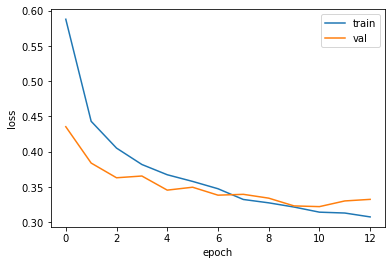

In [31]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()